# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [34]:
# import libraries
import nltk
nltk.download('punkt')
nltk.download('wordnet')
#nltk.download()
import pandas as pd
from sqlalchemy import create_engine
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import re
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn import multioutput
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
nltk.download('stopwords')
from self_transformers import StartingVerbExtractor
from sklearn.metrics import fbeta_score, make_scorer
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
# load data from database
engine = create_engine('sqlite:///DisasterResponse.db')
df = pd.read_sql ('SELECT * FROM MessagesCategories', engine)
#display (df.head (n=10))
X = df ['message']
y = df.iloc[:,4:]
y.head (n=3)

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. Write a tokenization function to process your text data

In [3]:
def tokenize(text):
    """Tokenization function. Receives as input raw text which afterwards normalized, stop words removed, stemmed and lemmatized.
    Returns tokenized text"""
    
    # Normalize text
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    
    stop_words = stopwords.words("english")
    
    #tokenize
    words = word_tokenize (text)
    
    #stemming
    stemmed = [PorterStemmer().stem(w) for w in words]
    
    #lemmatizing
    words_lemmed = [WordNetLemmatizer().lemmatize(w) for w in stemmed if w not in stop_words]
   
    return words_lemmed

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


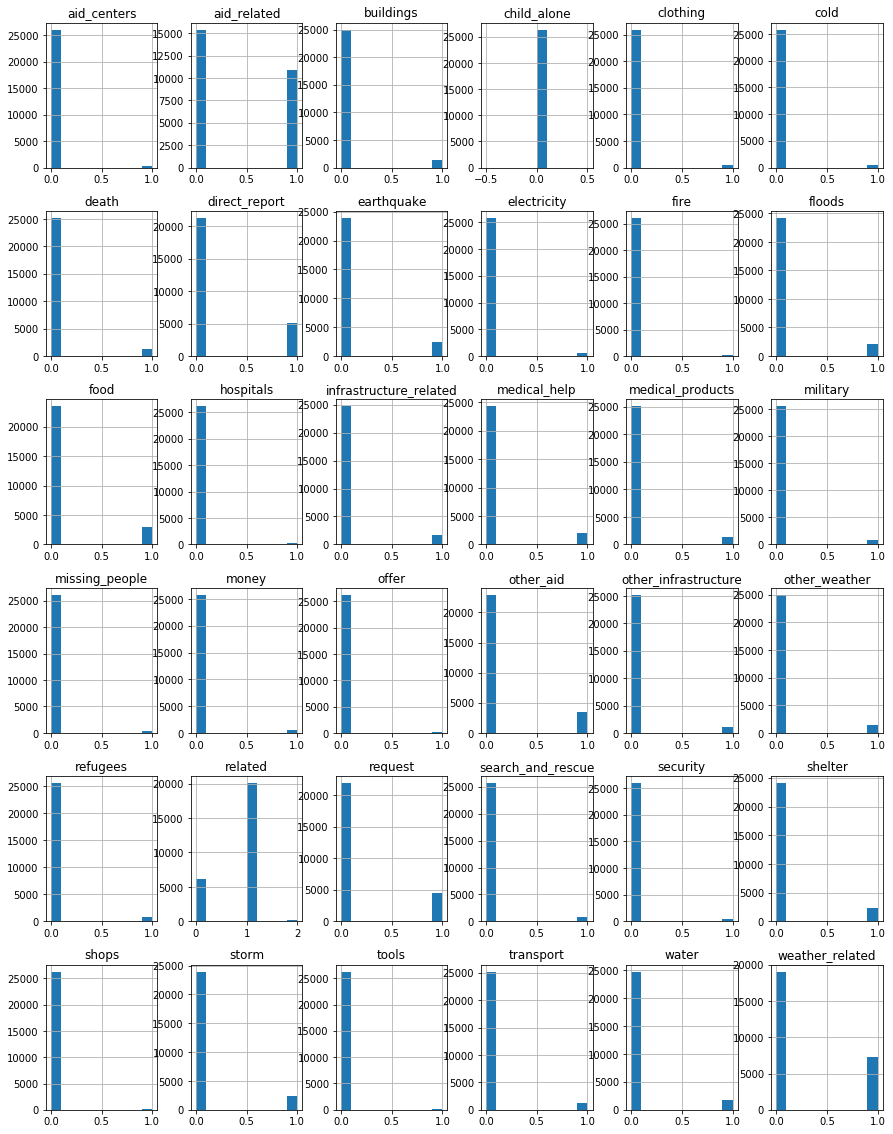

In [4]:
#let's take a look to the possible values distribution within classes

#making size of figure bigger
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
y.hist(ax = ax)
plt.show()

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [5]:
#setting pipeline
pipeline = Pipeline([
        ('vect', CountVectorizer(tokenizer=tokenize)),
        ('tfidf', TfidfTransformer()),
#        ('clf', multioutput.MultiOutputClassifier (RandomForestClassifier(), n_jobs = 35))
        ('clf', multioutput.MultiOutputClassifier (RandomForestClassifier()))
        ])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [7]:
# train classifier
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...oob_score=False, random_state=None, verbose=0,
            warm_start=False),
           n_jobs=1))])

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [8]:
!pip install -U scikit-learn

    100% |████████████████████████████████| 20.0MB 1.6MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.7MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1


In [20]:
y_pred = pipeline.predict(X_test)
    # print the metrics
category_names = list(df.columns[4:])
for i, col in enumerate(category_names):
    print('{} category metrics: '.format(col))
    print(classification_report(y_test.iloc[:,i], y_pred[:,i]))

related category metrics: 
             precision    recall  f1-score   support

          0       0.64      0.47      0.54      1541
          1       0.85      0.92      0.88      4991
          2       0.36      0.35      0.36        65

avg / total       0.79      0.81      0.80      6597

request category metrics: 
             precision    recall  f1-score   support

          0       0.90      0.98      0.93      5480
          1       0.78      0.44      0.56      1117

avg / total       0.88      0.88      0.87      6597

offer category metrics: 
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      6561
          1       1.00      0.06      0.11        36

avg / total       0.99      0.99      0.99      6597

aid_related category metrics: 
             precision    recall  f1-score   support

          0       0.75      0.86      0.80      3857
          1       0.75      0.59      0.66      2740

avg / total       0.75      0.7

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.


### 6. Improve your model
Use grid search to find better parameters. 

In [24]:
# fbeta_score scoring object using make_scorer()
#scorer = make_scorer (f1_scorer_evaluate)

parameters = { 'vect__max_df': (0.75, 1.0),
             #  'vect__stop_words': ('english', None),
                'clf__estimator__n_estimators': [10, 20],
                'clf__estimator__min_samples_split': [2, 5]
              }

cv = GridSearchCV (pipeline, param_grid= parameters, verbose =3 )


In [25]:
model = cv

In [26]:
model.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=10, vect__max_df=0.75 
[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=10, vect__max_df=0.75, score=0.23040776110353192, total= 1.1min
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=10, vect__max_df=0.75 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=10, vect__max_df=0.75, score=0.24514857489387507, total= 1.1min
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=10, vect__max_df=0.75 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.0min remaining:    0.0s


[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=10, vect__max_df=0.75, score=0.2427228623408126, total= 1.1min
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=10, vect__max_df=1.0 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.4min remaining:    0.0s


[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=10, vect__max_df=1.0, score=0.23010459299681674, total= 1.0min
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=10, vect__max_df=1.0 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  5.8min remaining:    0.0s


[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=10, vect__max_df=1.0, score=0.24620982413583992, total= 1.1min
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=10, vect__max_df=1.0 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.3min remaining:    0.0s


[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=10, vect__max_df=1.0, score=0.24408732565191024, total= 1.1min
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=20, vect__max_df=0.75 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  8.8min remaining:    0.0s


[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=20, vect__max_df=0.75, score=0.24344398969228437, total= 1.5min
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=20, vect__max_df=0.75 
[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=20, vect__max_df=0.75, score=0.25651910248635534, total= 1.6min
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=20, vect__max_df=0.75 
[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=20, vect__max_df=0.75, score=0.25272892662219526, total= 1.6min
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=20, vect__max_df=1.0 
[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=20, vect__max_df=1.0, score=0.24283765347885403, total= 1.6min
[CV] clf__estimator__min_samples_split=2, clf__estimator__n_estimators=20, vect__max_df=1.0 
[CV]  clf__estimator__min_samples_split=2, clf__estimator__n_estimators=20, vect__m

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 40.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...oob_score=False, random_state=None, verbose=0,
            warm_start=False),
           n_jobs=1))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'vect__max_df': (0.75, 1.0), 'clf__estimator__n_estimators': [10, 20], 'clf__estimator__min_samples_split': [2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=7)

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [27]:
y_pred_tuned = model.predict(X_test)
#converting to a dataframe
#y_pred_tuned = pd.DataFrame(y_pred_tuned, columns = y_test.columns)

category_names = list(df.columns[4:])
for i, col in enumerate(category_names):
    print('{} category metrics: '.format(col))
    print(classification_report(y_test.iloc[:,i], y_pred_tuned[:,i]))

related category metrics: 
             precision    recall  f1-score   support

          0       0.71      0.44      0.55      1541
          1       0.84      0.94      0.89      4991
          2       0.38      0.51      0.43        65

avg / total       0.81      0.82      0.80      6597

request category metrics: 
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      5480
          1       0.81      0.46      0.59      1117

avg / total       0.88      0.89      0.88      6597

offer category metrics: 
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      6561
          1       1.00      0.06      0.11        36

avg / total       0.99      0.99      0.99      6597

aid_related category metrics: 
             precision    recall  f1-score   support

          0       0.78      0.85      0.81      3857
          1       0.76      0.66      0.71      2740

avg / total       0.77      0.7

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.


### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [35]:
#trying to add another feature.

upd_pipeline = Pipeline([
        ('features', FeatureUnion ([
            
            ('text_pipeline', Pipeline ([
                ('vect', CountVectorizer(tokenizer=tokenize)),
                ('tfidf', TfidfTransformer())
                                        ])),      
             ('starting_verb', StartingVerbExtractor ())   
                                    ])),        
        
        ('clf', multioutput.MultiOutputClassifier (RandomForestClassifier ()))
        ])

# train SVM classifier
upd_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('text_pipeline', Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_d...oob_score=False, random_state=None, verbose=0,
            warm_start=False),
           n_jobs=1))])

In [36]:
y_pred_upd = upd_pipeline.predict(X_test)
#converting to a dataframe
#y_pred_tuned = pd.DataFrame(y_pred_tuned, columns = y_test.columns)

category_names = list(df.columns[4:])
for i, col in enumerate(category_names):
    print('{} category metrics: '.format(col))
    print(classification_report(y_test.iloc[:,i], y_pred_upd[:,i]))

related category metrics: 
             precision    recall  f1-score   support

          0       0.65      0.46      0.54      1541
          1       0.85      0.92      0.88      4991
          2       0.37      0.45      0.40        65

avg / total       0.79      0.81      0.80      6597

request category metrics: 
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      5480
          1       0.78      0.45      0.57      1117

avg / total       0.88      0.89      0.87      6597

offer category metrics: 
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      6561
          1       1.00      0.06      0.11        36

avg / total       0.99      0.99      0.99      6597

aid_related category metrics: 
             precision    recall  f1-score   support

          0       0.75      0.86      0.80      3857
          1       0.75      0.60      0.66      2740

avg / total       0.75      0.7

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.


### 9. Export your model as a pickle file

In [37]:
pickle.dump(model, open('final_model.sav', 'wb'))

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.